

## Single Instance Analysis

In [1]:
#@title Import Statements

# All import statements
from google.colab import drive
import json
import pandas as pd 
import requests
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


###Loading File and Extracting Data


In [2]:
#@title
# Mounting the drive, to access single JSON file stored
drive.mount('/content/drive')

# only reading one file for analysis
with open ('/content/drive/MyDrive/KEPIA_2576183S/Data/SetA_1.json') as path:
  instance = json.load(path)
  # type(instance)

# Preparing Data, extracting donor, Recipients and fetching payload from the Kidney Exchange Allocator API

# Donor
donors = pd.DataFrame(instance['data']).T

# Recipients
recipients = instance['recipients']
recipients = pd.DataFrame(recipients).T

# Fetching Payload
kep_instance_dict = {'data': instance['data']}

kep_instances_param = {
    'operation': 'maxcard',
    'altruistic_chain_length': 2,
    'data': json.dumps(kep_instance_dict)
}

KAL_url = ('https://kidney-nhs.optimalmatching.com/kidney/find.json')

response = requests.post(KAL_url, data = kep_instances_param)
print(f"Request returned {response.status_code} : '{response.reason}'")

payload = response.json() 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Request returned 200 : 'OK'


# Donor Data Analysis

In [3]:
#@title
# Checking for duplicates/similarities
donrs_temp = donors.copy()
def matches_to_string(row):
  if row is not np.nan and row is not None:
    temp = []
    for i in (row):
      temp.append(str(i))
    ','.join(temp)
    return str(temp)
  else:
    return None

def sources_to_string(row):
  if row is not np.nan and row is not None:
    return str(row[0])
  else:
    return None

donrs_temp['matches'] = donrs_temp['matches'].apply(lambda row: matches_to_string(row)) 
donrs_temp['sources'] = donrs_temp['sources'].apply(lambda row: sources_to_string(row)) 

if donrs_temp.duplicated().all():
  print('Donors contain similar values')
else:
  print('1. No similar donors in the list')

# replacing nan values to appropriate values 
donors.fillna(0)

print('2. Understanding columns and dtypes\n')
print(donors.dtypes)

print('\n3. Printing all donors table\n')
donors

1. No similar donors in the list
2. Understanding columns and dtypes

sources       object
dage          object
matches       object
bloodtype     object
altruistic    object
dtype: object

3. Printing all donors table



,sources,dage,matches,bloodtype,altruistic
4,[2],54,"[{'recipient': 22, 'score': 52}, {'recipient':...",A,NaN
5,[3],37,"[{'recipient': 14, 'score': 8}, {'recipient': ...",B,NaN
6,[4],24,"[{'recipient': 22, 'score': 42}, {'recipient':...",A,NaN
10,[7],18,"[{'recipient': 2, 'score': 35}, {'recipient': ...",O,NaN
11,[8],45,"[{'recipient': 2, 'score': 24}, {'recipient': ...",O,NaN
...,...,...,...,...,...
283,[250],44,"[{'recipient': 22, 'score': 14}, {'recipient':...",A,NaN
284,[251],40,"[{'recipient': 22, 'score': 77}]",A,NaN
285,[252],67,"[{'recipient': 2, 'score': 11}, {'recipient': ...",O,NaN
286,NaN,41,"[{'recipient': 22, 'score': 83}, {'recipient':...",A,True


In [4]:
#@title donor calculations
def count_matches(row):
  if isinstance(row['matches'], list) :
    return int(len(row['matches']))
  else:
    return 0

l = []
for i in donors['matches']:
    l.append(str(i))
donors['Matches'] = l
donors['Matches'][donors['Matches'] == np.NaN] = 0
donors['matches_count'] = donors.apply(lambda row: (count_matches(row)) ,axis = 1)


total = (donors.shape[0])
alt_donors = str(donors.shape[0] - donors['altruistic'].isnull().sum())
non_alt_donors = str(donors['altruistic'].isnull().sum())
no_matches = str(donors['matches'].isnull().sum())

# code to count multiple donors, along with donor ids
d = donors.copy()
x = d['sources'].value_counts(dropna = 'True')
y = x.where(x > 1).value_counts(dropna = 'True')
multiple_donors_count = y.to_dict()
k = list(multiple_donors_count.keys())
v = list(multiple_donors_count.values())
two_donors = x.index[x == 2]
three_donors = x.index[x == 3]
four_donors = x.index[x == 4]
non_alt_list = donors.index[donors['altruistic'] == True]
no_matches_list = donors.index[donors['matches_count'] == 0]
multiple_total = 0
for i in range(len(v)):
    multiple_total = multiple_total + int(v[i] )
print('\n 4. Total Donors :' + str(total))
print('\n 5. Donors with 0 matches :' + no_matches + ' \n    Donor ids : ' +','.join(no_matches_list))

print('\n 6. Donors with multiple Sources : ' + str(multiple_total) )
for i in range(len(k)):
  print('\n  * '+str(v[i]) + ' donors with ' + str(int(k[i] ))+ ' sources ')
a = []
for i in two_donors:
    a.append(i)
if(len(a) != 0):
    print('\n*  Two Donors Ids' + str(a))
b = []
for i in three_donors:
    b.append(i)
if(len(b) != 0):
   print('\n*  Three donors Ids'+ str(b) )
c = []
for i in four_donors:
    c.append(i)
if(len(c) != 0):
    print('\n*  Four Donors Ids'+ str(c) )

sub = d[['dage','Matches','matches_count','bloodtype']][donors['altruistic'] == True ]
print('\n 7. Altruistic Donors count :' + alt_donors)
print('\n   Altruistic Donors are as follows - \n ')
sub



 4. Total Donors :206

 5. Donors with 0 matches :4 
    Donor ids : 30,170,218,230

 6. Donors with multiple Sources : 19

  * 15 donors with 2 sources 

  * 4 donors with 3 sources 

*  Two Donors Ids[[152], [120], [144], [241], [8], [174], [19], [96], [20], [76], [177], [123], [95], [134], [220]]

*  Three donors Ids[[63], [21], [207], [223]]

 7. Altruistic Donors count :2

   Altruistic Donors are as follows - 
 


,dage,Matches,matches_count,bloodtype
286,41,"[{'recipient': 22, 'score': 83}, {'recipient':...",7,A
287,57,"[{'recipient': 22, 'score': 83}, {'recipient':...",6,A



 8. Unique blood type in donors - ['A' 'B' 'O' 'AB']
---------------------

 9. Count of donors with each bloodtype - 
 A     96
O     86
B     15
AB     9
Name: bloodtype, dtype: int64
---------------------

 10.percentage of donors of each blood type - 
 A     46.601942
O     41.747573
B      7.281553
AB     4.368932
Name: bloodtype, dtype: float64
---------------------


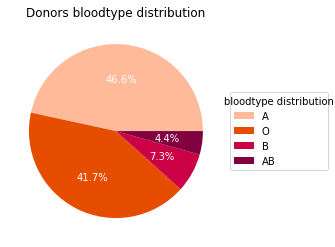

---------------------
11. Donor age distribution in the instance


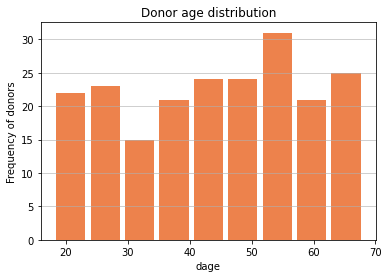

---------------------
11. Donor match count distribution in the instance


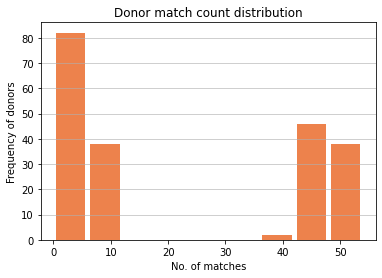

---------------------
12. Correlation Matrix between attributes


In [5]:
#@title

print('\n 8. Unique blood type in donors -', donors['bloodtype'].unique())
values = donors['bloodtype'].value_counts()
print("---------------------")
print('\n 9. Count of donors with each bloodtype - \n', values)
values = donors['bloodtype'].value_counts(normalize=True)
print("---------------------")
print('\n 10.percentage of donors of each blood type - \n', values * 100)
print("---------------------")
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00', '#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['A','O','B','AB'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'bloodtype distribution' ,mode = 'expand')
plt.title ('Donors bloodtype distribution')
plt.show()
print("---------------------")
print('11. Donor age distribution in the instance')
n, bins, patches = plt.hist(x=donors['dage'], bins='auto', color='#e64d00',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('dage')
plt.ylabel('Frequency of donors')
plt.title('Donor age distribution')
plt.show()
print("---------------------")
print('11. Donor match count distribution in the instance')
n, bins, patches = plt.hist(x=donors['matches_count'], bins='auto', color='#e64d00',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('No. of matches')
plt.ylabel('Frequency of donors')
plt.title('Donor match count distribution')
plt.show()
print("---------------------")
print("12. Correlation Matrix between attributes")



#Recipient Data analysis

In [6]:
#@title

# Checking for duplicates/similarities
recipient_temp = recipients.copy()

if recipient_temp.duplicated().all():
  print('Recipients contain similar values')
else:
  print('1. No similar Recipients in the list')

# replacing nan values to appropriate values 
recipients.fillna(0)

print('2. Understanding columns and dtypes\n')
print(recipients.dtypes)

print('\n3. Printing all recipients in a table\n')
recipients

1. No similar Recipients in the list
2. Understanding columns and dtypes

cPRA                       object
bloodtype                  object
hasBloodCompatibleDonor    object
dtype: object

3. Printing all recipients in a table



,cPRA,bloodtype,hasBloodCompatibleDonor
2,0,O,False
3,0.97,A,False
4,1,O,False
7,0.95,O,True
8,0.93,A,True
...,...,...,...
248,0,O,False
249,1,O,True
250,0.99,A,True
251,1,O,False



 1. Total no. of recipients - 181

 2. Unique blood type in recipients ['O' 'A' 'B' 'AB']

 3. Count of recipients of each blood type - 
 O     112
A      47
B      17
AB      5
Name: bloodtype, dtype: int64
---------------------

 4. percentage of recipients of each blood type - 
 O     61.878453
A     25.966851
B      9.392265
AB     2.762431
Name: bloodtype, dtype: float64
---------------------


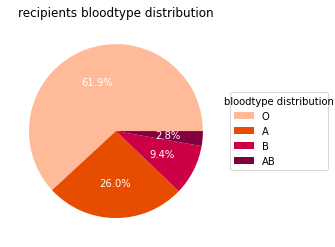

---------------------

 5. Count of recipients in terms of blood compatible donors - 
 True     97
False    84
Name: hasBloodCompatibleDonor, dtype: int64

 6. percentage of recipients in terms of blood compatible donors - 
 True     53.59116
False    46.40884
Name: hasBloodCompatibleDonor, dtype: float64


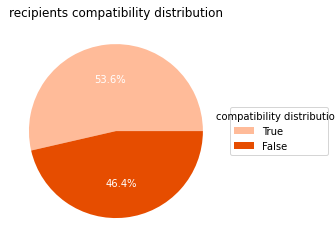

---------------------


Text(0.5, 1.0, 'Distribution of cPRA')

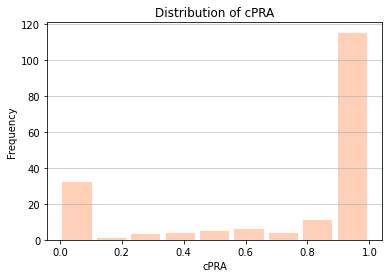

In [7]:
#@title
# unique bloodtypes in reciepint
print('\n 1. Total no. of recipients - ' + str(len(recipients)))
print('\n 2. Unique blood type in recipients', recipients['bloodtype'].unique())
values_x = recipients['bloodtype'].value_counts()
print('\n 3. Count of recipients of each blood type - \n', values_x )
print("---------------------")
values = recipients['bloodtype'].value_counts(normalize=True)
print('\n 4. percentage of recipients of each blood type - \n', values * 100)
print("---------------------")
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00', '#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['O','A','B','AB'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'bloodtype distribution' ,mode = 'expand')
plt.title ('recipients bloodtype distribution')
plt.show()
print("---------------------")
values_x = recipients['hasBloodCompatibleDonor'].value_counts()
print('\n 5. Count of recipients in terms of blood compatible donors - \n', values_x)
values = recipients['hasBloodCompatibleDonor'].value_counts(normalize=True)
print('\n 6. percentage of recipients in terms of blood compatible donors - \n', values * 100)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, ['True','False'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'compatibility distribution' ,mode = 'expand')
plt.title ('recipients compatibility distribution')
plt.show()
print("---------------------")
n, bins, patches = plt.hist(x=recipients['cPRA'], bins='auto', color='#ffbb99',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('cPRA')
plt.ylabel('Frequency')
plt.title('Distribution of cPRA')

In [8]:
#@title Input for filtering recipients
# filtering recipients, test code, actual code is implemented in application
cPRAmax = 1
cPRAlow = 0
bt = 'O'
bcd = True
try:
  cPRAlow = int(input('enter the lower range of cPRA value (left blank will be considered 0): '))
except ValueError:
  cPRAlow = 0

try:
  cPRAmax = int(input('enter max value of cPRA value (if left blank will be considered 1):'))
except ValueError:
  cPRAmax = 1

try:

  bt = str(input('enter blood group (default will be considered O):'))
except ValueError:
  bt = 'O'

if bt =='':
  bt = 'O'

try:
  bcd = str(input('enter has compatible donor types (default is True):'))
except ValueError:
  bcd = True
if bcd =='':
  bcd = True



enter the lower range of cPRA value (left blank will be considered 0): 0
enter max value of cPRA value (if left blank will be considered 1):1
enter blood group (default will be considered O):A
enter has compatible donor types (default is True):


The filtered recipients are as follows - total count : 41


         cPRA bloodtype hasBloodCompatibleDonor
8        0.93         A                    True
17          1         A                    True
19       0.99         A                    True
25          1         A                    True
28   0.899533         A                    True
36       0.92         A                    True
54       0.99         A                    True
56          1         A                    True
61          1         A                    True
63   0.774842         A                    True
68          1         A                    True
70        0.9         A                    True
74       0.98         A                    True
76   0.554765         A                    True
87          1         A                    True
97   0.674726         A                    True
99       0.97         A                    True
100      0.98         A                    True
101         1         A     

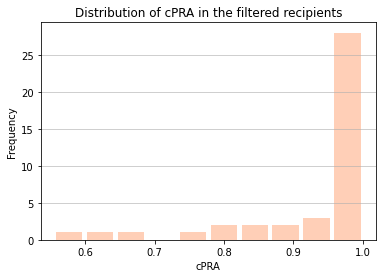

In [9]:
#@title
sub_df = recipients[ ((recipients['cPRA'] >= cPRAlow )& (recipients['cPRA'] <= cPRAmax)) & (recipients['bloodtype'] == bt.lower().upper()) & (recipients['hasBloodCompatibleDonor'] == bcd) ]
if(len(sub_df) == 0):
  print('No recipients for this attributes selected')
else:
  print('The filtered recipients are as follows - total count : ' + str(len(sub_df)))
  print('\n')
  print(sub_df)

  print('-----------')
  n, bins, patches = plt.hist(x=sub_df['cPRA'], bins='auto', color='#ffbb99',
                            alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel('cPRA')
  plt.ylabel('Frequency')
  plt.title('Distribution of cPRA in the filtered recipients')
  plt.show()

#All cycles analysis

In [10]:
# @title utility functions
# utility function to calculate cycle and chains for each cycle
def calculate_cycles_chains(payload,ids):
    cycle_2 = []
    cycle_3 = []
    s_chain = []
    l_chain = []
    for i in ids:
      c2 = 0
      c3 = 0
      sc = 0
      lc = 0
      type =''

      a = payload.get('output').get('all_cycles').get(str(i)).get('cycle')
      df = pd.DataFrame(a)

      c2,c3,sc,lc,type = per_cycle(df)

      cycle_2.append(c2)
      cycle_3.append(c3)
      s_chain.append(sc)
      l_chain.append(lc)

    return cycle_2, cycle_3, s_chain, l_chain

def per_cycle(df):
    c2 = 0
    c3 = 0
    sc = 0
    lc = 0
    is_altruistic = False
    rows = len(df)
    type = ''
    if 'a' in df:
        is_altruistic = True

    if rows == 2:
         if is_altruistic:
             sc = 1
             type = 'Short chain'

         else:
             c2 = 1
             type = 'Two cycle'
    elif rows == 3:
        if is_altruistic:
            lc = 1
            type = 'Long chain'
        else:
            c3 = 1
            type = 'Three cycle'
    return c2,c3,sc,lc,type


In [11]:
#@title
# extracting all cycles from the payload
all_ids = []
all = payload.get('output').get('all_cycles')
for i in all:
    all_ids.append(i)

# computing cycle type for all cycles, and concatenating in column as shown below
all_cycles = pd.DataFrame(all).T

all_cycles = all_cycles.astype({'cycle': 'str' })
all_cycles = all_cycles.astype({'alt' : 'str'})
cycle_2, cycle_3, s_chain, l_chain = calculate_cycles_chains(payload,all_ids)
all_cycles['Two cycles'] = cycle_2
all_cycles['Three cycles'] = cycle_3
all_cycles['Short Chains'] = s_chain
all_cycles['Long Chains'] = l_chain

total = len(all_cycles)

if all_cycles.duplicated().all():
  print('all cycles contain similar values')
else:
  print('1. No similar cycles in the list')

# replacing nan values to appropriate values 
all_cycles.fillna(0)

print('2. Understanding columns and dtypes\n')
print(all_cycles.dtypes)

print('\n3. Printing all cycles table\n')
all_cycles

1. No similar cycles in the list
2. Understanding columns and dtypes

cycle           object
backarcs        object
weight          object
alt             object
altruistic      object
Two cycles       int64
Three cycles     int64
Short Chains     int64
Long Chains      int64
dtype: object

3. Printing all cycles table



,cycle,backarcs,weight,alt,altruistic,Two cycles,Three cycles,Short Chains,Long Chains
1,"[{'d': 287, 'a': True, 'tb': 0.01296, 'dif': 0...",0,83.013,[],True,0,0,1,0
2,"[{'d': 287, 'a': True, 'tb': 0.04489, 'dif': 3...",0,24.0449,[],True,0,0,1,0
3,"[{'d': 287, 'a': True, 'tb': 0.02304, 'dif': 0...",0,30.023,[],True,0,0,1,0
4,"[{'d': 287, 'a': True, 'tb': 0.04096, 'dif': 3...",0,23.041,[],True,0,0,1,0
5,"[{'d': 287, 'a': True, 'tb': 0.04356, 'dif': 3...",0,53.0436,[],True,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1822,"[{'p': 39, 'd': 49, 'tb': 0.02704, 'dif': 3, '...",1,162.087,[],NaN,0,1,0,0
1823,"[{'p': 221, 'd': 251, 'tb': 0.01024, 'dif': 0,...",0,126.053,[],NaN,0,1,0,0
1824,"[{'p': 70, 'd': 83, 'tb': 0.04489, 'dif': 3, '...",0,85.1065,[],NaN,0,1,0,0
1825,"[{'p': 156, 'd': 179, 'tb': 0.03249, 'dif': 3,...",0,128.082,[],NaN,0,1,0,0


1. Total No. of Cycles: 1826
2. Total no. of 2 cycles - 140
3. Total no. of 3 cycles - 1214
4. Total no. of short chains - 16
5. Total no. of long chains - 456
---------------------


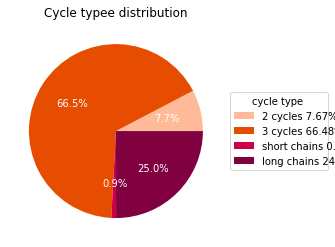

-----------


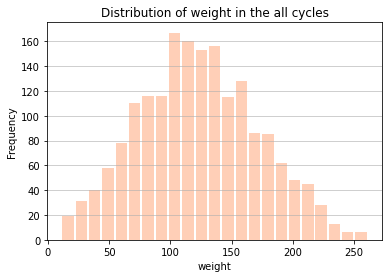


 6. Count of cycles with backarcs - 
 1    975
2    466
0    293
3     92
Name: backarcs, dtype: int64
---------------------

 7. percentage of cycle backarcs - 
 1    53.395400
2    25.520263
0    16.046002
3     5.038335
Name: backarcs, dtype: float64
---------------------


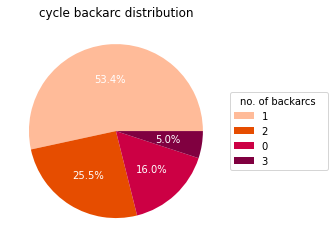

In [12]:
#@title
# Printing Cycle statistics and other attributes distribution in the cycle

print("1. Total No. of Cycles: " + str(total))
print("2. Total no. of 2 cycles - " + str(all_cycles['Two cycles'].sum()))
print("3. Total no. of 3 cycles - " + str(all_cycles['Three cycles'].sum()))
print("4. Total no. of short chains - " + str(all_cycles['Short Chains'].sum()))
print("5. Total no. of long chains - " + str(all_cycles['Long Chains'].sum()))


df = all_cycles.copy()
a = round(df['Two cycles'].sum()/total * 100,2)
b = round(df['Three cycles'].sum()/total *100,2)
c = round(df['Short Chains'].sum()/total * 100,2)
d = round(df['Long Chains'].sum()/total * 100,2)
labels = ['2 cycles ' + str(a) +'%','3 cycles '+ str(b) +'%','short chains ' + str(c) +'%','long chains '+ str(d) +'%']
values = [round(a,2),round(b,2),round(c,2),round(d,2)]

print("---------------------")
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00', '#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, labels,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'cycle type ' ,mode = 'expand')
plt.title ('Cycle typee distribution')
plt.show()

print('-----------')
n, bins, patches = plt.hist(x=df['weight'], bins='auto', color='#ffbb99',
                          alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution of weight in the all cycles')
plt.show()

values_x = df['backarcs'].value_counts()
print('\n 6. Count of cycles with backarcs - \n', values_x )
print("---------------------")
values = df['backarcs'].value_counts(normalize=True)
print('\n 7. percentage of cycle backarcs - \n', values * 100)
print("---------------------")
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00', '#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges,['1','2','0','3'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'no. of backarcs ' ,mode = 'expand')
plt.title ('cycle backarc distribution')
plt.show()



#Exchange cycle Analysis

In [13]:
#@title
# Extracting exchange data from the payload
e = payload.get('output').get('exchange_data')[0]
keys = e.keys()
values = e.values()


In [14]:
#@title
# printing exchange data
print("------ Exchange Data: \n")
i = 1
for k in keys:
  print( str(i) +str('. ')+ str(k) +'  :    ' + str(e.get(k) ) )
  i = int(i)+1

# Extracting cycles that are selected in exchanges from all_cycles
print("----------------")
print('Summary of Exchange cycels - ')

all = payload.get('output').get('all_cycles')
exc = []
ids =[]
for i in e.get('exchanges'):
    ids.append(str(i))
    exc.append(payload.get('output').get('all_cycles').get(str(i)))
cycle_2, cycle_3, s_chain, l_chain = calculate_cycles_chains(payload,ids)
df = pd.DataFrame(exc)
df['Two cycles'] = cycle_2
df['Three cycles'] = cycle_3
df['Short Chains'] = s_chain
df['Long Chains'] = l_chain
df.insert(0,'cycle Id',ids)
exchanges_copy = df.copy()
df = df.astype({'cycle': 'str' })
df = df.astype({'alt' : 'str'})
# creating exchange cycle dataframe
exchanges = df

# chceking for any duplicate exchnages
if exchanges.duplicated().all():
  print('1. Exchanges contain similar values')
else:
  print('1. No duplicate exchanges cycles in the list')

# replacing nan values to appropriate values 
exchanges.fillna(0)

print('2. Understanding columns and dtypes\n')
print(exchanges.dtypes)

print('\n3. Printing exchanges table\n')
exchanges


------ Exchange Data: 

1. description  :    (COIN) iteration to maximise the total number of transplants, iteration to maximise the total weight
2. exchanges  :    [2, 7, 150, 154, 155, 156, 656, 882, 998, 1031, 1111, 1122, 1525, 1580, 1586, 1598, 1608, 1632, 1639, 1658, 1692, 1735, 1738, 1772, 1803]
3. weight  :    3775.19705
4. two_way_exchanges  :    6
5. total_transplants  :    69
6. three_way_exchanges  :    19
----------------
Summary of Exchange cycels - 
1. No duplicate exchanges cycles in the list
2. Understanding columns and dtypes

cycle Id         object
cycle            object
backarcs          int64
weight          float64
alt              object
altruistic       object
Two cycles        int64
Three cycles      int64
Short Chains      int64
Long Chains       int64
dtype: object

3. Printing exchanges table



,cycle Id,cycle,backarcs,weight,alt,altruistic,Two cycles,Three cycles,Short Chains,Long Chains
0,2,"[{'d': 287, 'a': True, 'tb': 0.04489, 'dif': 3...",0,24.04489,[],True,0,0,1,0
1,7,"[{'d': 286, 'a': True, 'tb': 0.02704, 'dif': 3...",0,86.02704,[],True,0,0,1,0
2,150,"[{'p': 228, 'd': 260, 'tb': 0.02809, 'dif': 3,...",0,160.05618,[],NaN,1,0,0,0
3,154,"[{'p': 21, 'd': 28, 'tb': 0.04096, 'dif': 3, '...",0,78.08192,[],NaN,1,0,0,0
4,155,"[{'p': 173, 'd': 197, 'tb': 0.03025, 'dif': 3,...",0,116.06050,[],NaN,1,0,0,0
5,156,"[{'p': 225, 'd': 257, 'tb': 0.01764, 'dif': 0,...",0,112.03528,[],NaN,1,0,0,0
6,656,"[{'p': 76, 'd': 89, 'tb': 0.03136, 'dif': 3, '...",0,229.10196,[655],NaN,0,1,0,0
7,882,"[{'p': 97, 'd': 115, 'tb': 0.03481, 'dif': 3, ...",0,187.11802,[],NaN,0,1,0,0
8,998,"[{'p': 211, 'd': 240, 'b': 51, 'tb': 0.02025, ...",2,161.08750,[],NaN,0,1,0,0
9,1031,"[{'p': 176, 'd': 201, 'b': 53, 'tb': 0.03364, ...",1,157.11628,[],NaN,0,1,0,0


1. Total No. of exchange Cycles: 1826
2. Total no. of 2 cycles - 4
3. Total no. of 3 cycles - 19
4. Total no. of short chains - 2
5. Total no. of long chains - 0
---------------------


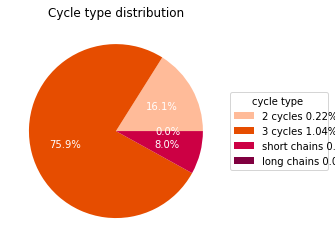

-----------


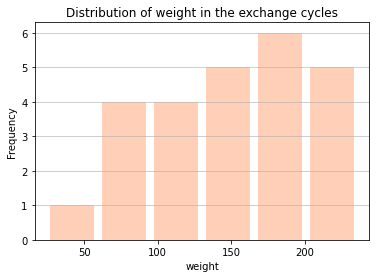


 6. Count of cycles with backarcs - 
 1    13
0    11
2     1
Name: backarcs, dtype: int64
---------------------

 7. percentage of cycle backarcs - 
 1    52.0
0    44.0
2     4.0
Name: backarcs, dtype: float64
---------------------


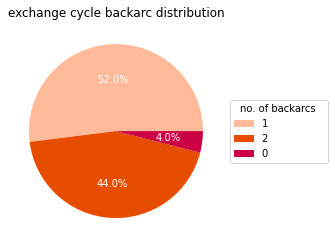

In [15]:
#@title
# calculating exchanges summary and attribute distribution
print("1. Total No. of exchange Cycles: " + str(total))
print("2. Total no. of 2 cycles - " + str(exchanges['Two cycles'].sum()))
print("3. Total no. of 3 cycles - " + str(exchanges['Three cycles'].sum()))
print("4. Total no. of short chains - " + str(exchanges['Short Chains'].sum()))
print("5. Total no. of long chains - " + str(exchanges['Long Chains'].sum()))

df = exchanges.copy()
a = round(df['Two cycles'].sum()/total * 100,2)
b = round(df['Three cycles'].sum()/total *100,2)
c = round(df['Short Chains'].sum()/total * 100,2)
d = round(df['Long Chains'].sum()/total * 100,2)
labels = ['2 cycles ' + str(a) +'%','3 cycles '+ str(b) +'%','short chains ' + str(c) +'%','long chains '+ str(d) +'%']
values = [round(a,2),round(b,2),round(c,2),round(d,2)]

print("---------------------")
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00', '#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges, labels,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'cycle type ' ,mode = 'expand')
plt.title ('Cycle type distribution')
plt.show()

print('-----------')
n, bins, patches = plt.hist(x=df['weight'], bins='auto', color='#ffbb99',
                          alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('Distribution of weight in the exchange cycles')
plt.show()

values_x = df['backarcs'].value_counts()
print('\n 6. Count of cycles with backarcs - \n', values_x )
print("---------------------")
values = df['backarcs'].value_counts(normalize=True)
print('\n 7. percentage of cycle backarcs - \n', values * 100)
print("---------------------")
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values,  colors = ['#ffbb99', '#e64d00', '#cc0044', '#800040'],
autopct = '%1.1f%%',
textprops={ 'color':'white'})
ax.legend(wedges,['1','2','0','3'],loc="center left",bbox_to_anchor=(1, 0, 0.5, 1),title = 'no. of backarcs ' ,mode = 'expand')
plt.title ('exchange cycle backarc distribution')
plt.show()